# DATA VISUALIZATION WITH SEABORN
Reference: https://elitedatascience.com/python-seaborn-tutorial

Step 1: Installing Seaborn and Importing the dataset

In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

In [7]:
#Importing the data set and setting first column as the index
#I was getting an unicodedecode error hence i defined the attribute 'encoding'
df=pd.read_csv('Pokemon.csv',index_col=0,encoding= 'unicode_escape')

In [8]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


C:\Users\Arya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


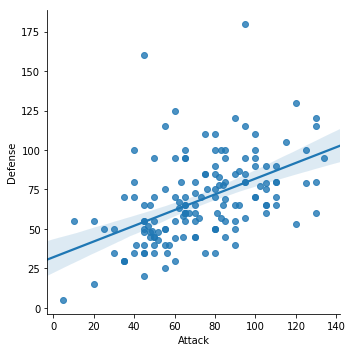

In [9]:
#We start by comparing the defense and attack of various pokemons. For this, we import an lmplot()
sns.lmplot(x='Attack',y='Defense',data=df)

I get a straight line through the points, this is because seaborn does not has a dedicated scatter plot fuction hence instead I'm using a line regression function to draw a scatter plot.

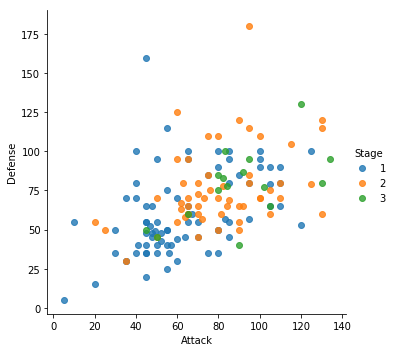

In [10]:
#Actual Scatter Plot
sns.lmplot(x='Attack',y='Defense',data=df , fit_reg=False#removing reg line
           , hue='Stage') #colors as per evolution level

(25, 190.44212186867063)

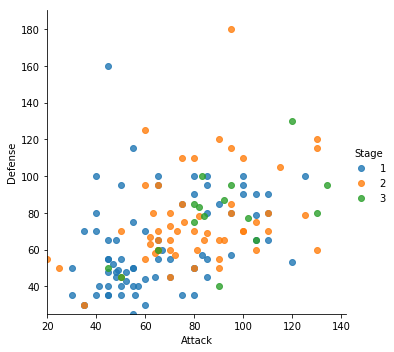

In [12]:
#incase we want custom axis
sns.lmplot(x='Attack',y='Defense',data=df , fit_reg=False#removing reg line
           , hue='Stage') #colors as per evolution level
plt.xlim(20,None)
plt.ylim(25,None)


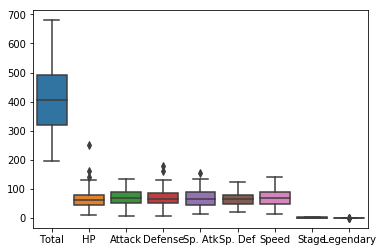

In [13]:
sns.boxplot(data=df)

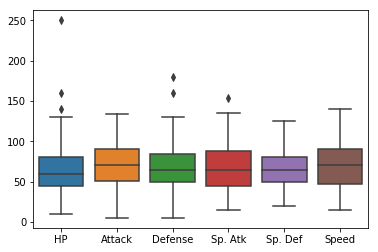

In [14]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)


In [ ]:
VIOLIN PLOT

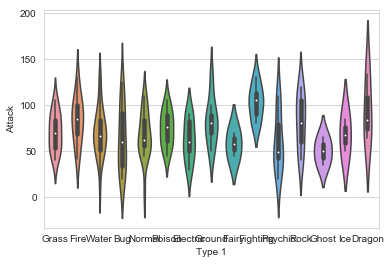

In [15]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

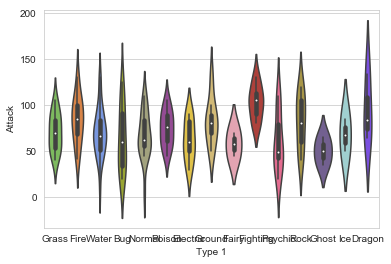

In [16]:
#Setting Custom Colours
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

SWARM PLOT

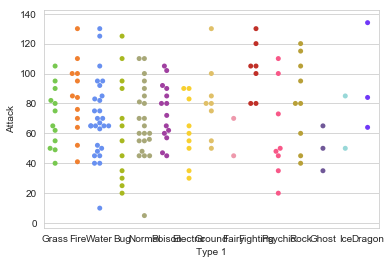

In [17]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)


Text(0.5, 1.0, 'Attack by Type')

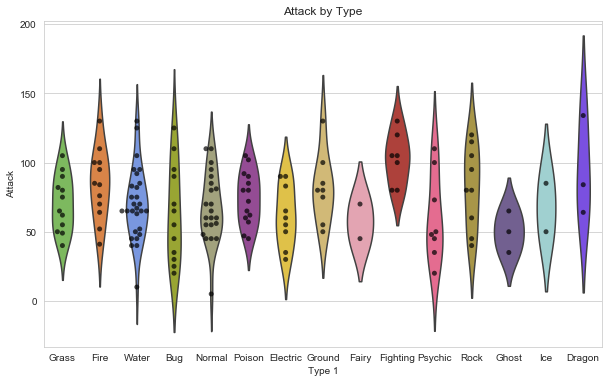

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

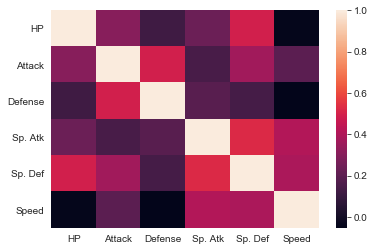

In [19]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

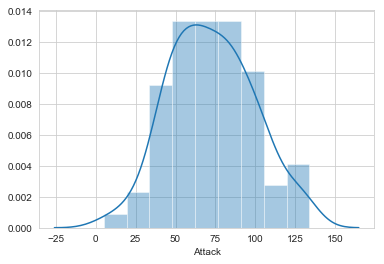

In [20]:
#Histogram

# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

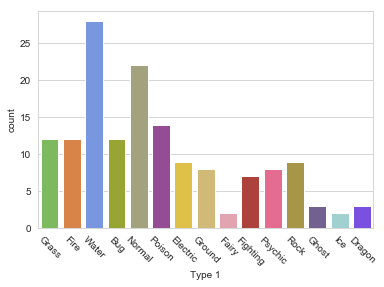

In [21]:
#Bar Plot

sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

C:\Users\Arya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


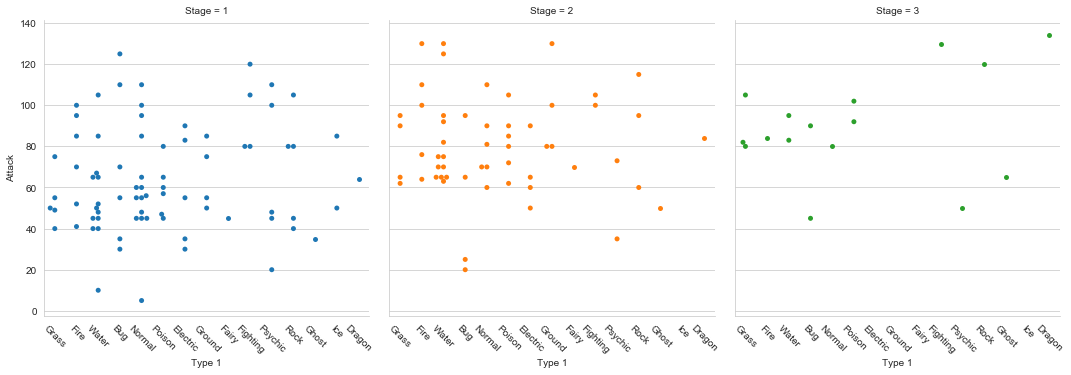

In [22]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 


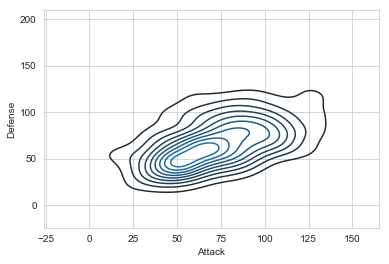

In [23]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

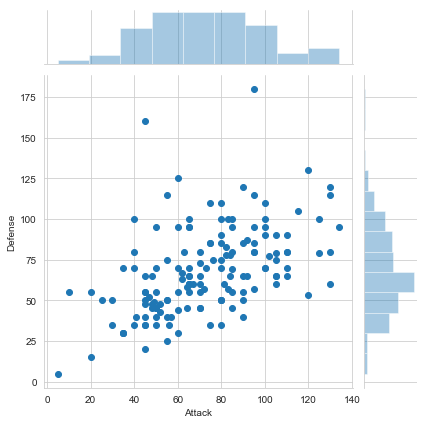

In [24]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
